In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re

In [2]:
input_data = pd.read_csv('/home/vignesh/Downloads/QueryResults(3).csv')

In [3]:
input_data[0:1]

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ParentId.1,first_response,date_diff,hr_diff,relatedCounts
0,48126859,1,NaN,NaN,2018-01-06 11:27:23,NaN,0,442,<p>I want to try to use python to connect to M...,7815532.0,...,1,0,NaN,NaN,NaN,48126859,2018-12-17 08:03:07,345,8277,1


In [10]:
input_data['Tags'][0:100]

0                                       <python><mysql>
1                     <python><snmp><pysnmp><snmp-trap>
2                        <python><graph><slider><bokeh>
3                    <python><search><imap><imapclient>
4                                     <python><imaplib>
5            <python><jupyter-notebook><torch><pytorch>
6                                    <python><ssh><pip>
7                         <python><tensorflow><dataset>
8                                      <python><django>
9                             <python><logging><pytest>
10                                 <python><matplotlib>
11             <python><selenium><firefox><geckodriver>
12                                       <python><jira>
13               <python><pycharm><packages><traceback>
14                          <python><linux><python-2.7>
15    <python><python-3.x><drop-down-menu><widget><j...
16                                     <python><pandas>
17                        <python><html><beautif

In [4]:
input_data.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ParentId.1', 'first_response', 'date_diff', 'relatedCounts'],
      dtype='object')

In [5]:
print(input_data['Body'][0:2])

0    <p>I want to try to use python to connect to M...
1    <p>I received an SNMP trap message in Python3,...
Name: Body, dtype: object


In [11]:
number_of_code_tags = []
lines_of_code = []
lines_without_code = []
tags_count = []
for index,i in input_data.iterrows():
    tags_str = i.Tags
    soup = BeautifulSoup(i.Body, 'html.parser')
    code = soup.findAll('code')
    paragraph = soup.findAll('p')
    tags_split = len(tags_str.split('><'))
    counter = 0
    paracounter = 0
    for c in code:
        try:
            counter += len(re.findall("\n", c.string))
        except:
            pass
        
    for c in paragraph:
        try:
            paracounter += len(re.findall("\n", c.string))
        except:
            pass
    lines_of_code.append(counter)
    lines_without_code.append(paracounter)
    number_of_code_tags.append(len(code))
    tags_count.append(tags_split)

[2, 4, 4, 4, 2, 4, 3, 3, 2, 3]

(array([7.759e+03, 9.360e+02, 3.370e+02, 1.190e+02, 6.100e+01, 3.700e+01,
        9.000e+00, 6.000e+00, 4.000e+00, 2.000e+00]),
 array([  0. ,  79.4, 158.8, 238.2, 317.6, 397. , 476.4, 555.8, 635.2,
        714.6, 794. ]),
 <a list of 10 Patch objects>)

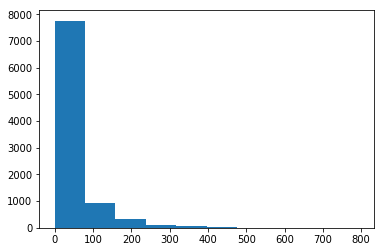

In [7]:
plt.hist(lines_of_code)

(array([8.211e+03, 8.150e+02, 1.700e+02, 4.000e+01, 1.800e+01, 6.000e+00,
        5.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <a list of 10 Patch objects>)

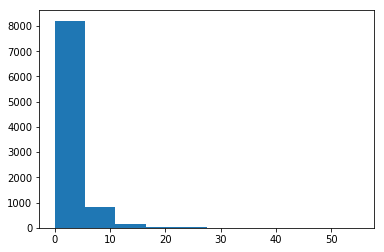

In [8]:
plt.hist(number_of_code_tags)

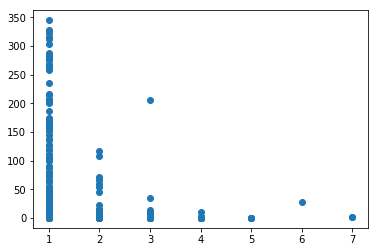

In [8]:
plt.scatter(input_data['relatedCounts'],input_data['hr_diff'])

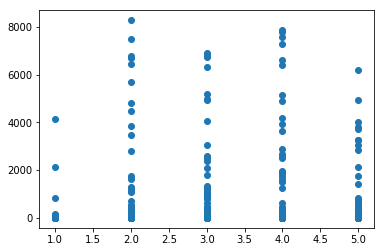

In [13]:
plt.scatter(tags_count,input_data['hr_diff'])

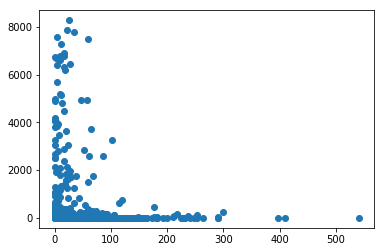

In [15]:
plt.scatter(lines_of_code,input_data['hr_diff'])

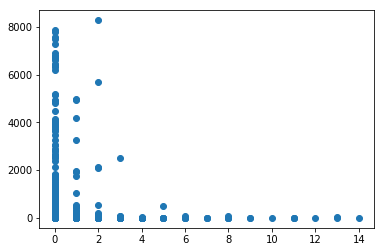

In [19]:
# input_data_within_20 = input_data[input_data['hr_diff']<=5]
input_data['lines_without_code'] = lines_without_code
input_data_filter_within_20 = input_data[input_data['lines_without_code']<=20]
plt.scatter(input_data_filter_within_20['lines_without_code'],input_data_filter_within_20['hr_diff'])

(array([1558.,    0.,  707.,    0.,  169.,    0.,  105.,    0.,   51.,
          45.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

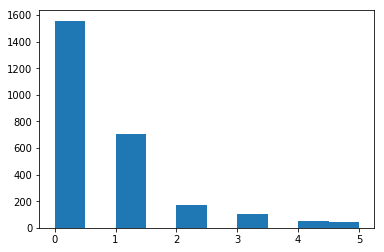

In [17]:
input_data_within_50 = input_data[input_data['hr_diff']<=5]
plt.hist(input_data_within_50['hr_diff'])

# input_data_within_10 = input_data[input_data['number_of_days']<=10]

(array([7199., 1101.,  250.,  170.,  100.,   72.,   60.,   53.,   29.,
          63.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

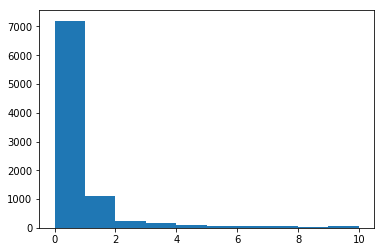

In [12]:
plt.hist(input_data_within_10['number_of_days'])